<a href="https://colab.research.google.com/github/iotanalytics/IoTTutorial/blob/main/code/clustering_and_classification/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##BAGGING CLASSIFICATION

From: **Geeks for Geeks**

*Modified: Stephen Coshatt*

<br/>

**References:**

1.   https://www.geeksforgeeks.org/ml-bagging-classifier/
2.   https://www.researchgate.net/figure/Pros-and-cons-of-bagging-and-boosting_tbl3_272864141
3.   https://datatrained.com/post/bagging-and-boosting/

</br>

In machine learning, for building solid and reliable models prediction accuracy is the key factor. Ensemble learning is a supervised machine-learning technique that combines multiple models to build a more powerful and robust model. The idea is that by combining the strengths of multiple models, we can create a model that is more robust and less likely to overfit the data. It can be used for both classifications and regression tasks. [1]

Ensemble learning techniques can be categorized in three ways:

1. Bagging (Bootstrap Aggregating)
2. Boosting
3. Stacking (Stacked Generalization)

Bagging is a supervised machine-learning technique, and it can be used for both regression and classification tasks, In this article we will discuss the bagging classifier.


##Bagging Classifier

Bagging (or Bootstrap aggregating) is a type of ensemble learning in which multiple base models are trained independently in parallel on different subsets of the training data. Each subset is generated using bootstrap sampling, in which data points are picked at random with replacement. In the case of the Bagging classifier, the final prediction is made by aggregating the predictions of the all-base model, using majority voting. In the case of regression, the final prediction is made by averaging the predictions of the all-base model, and that is known as bagging regression.

</br>

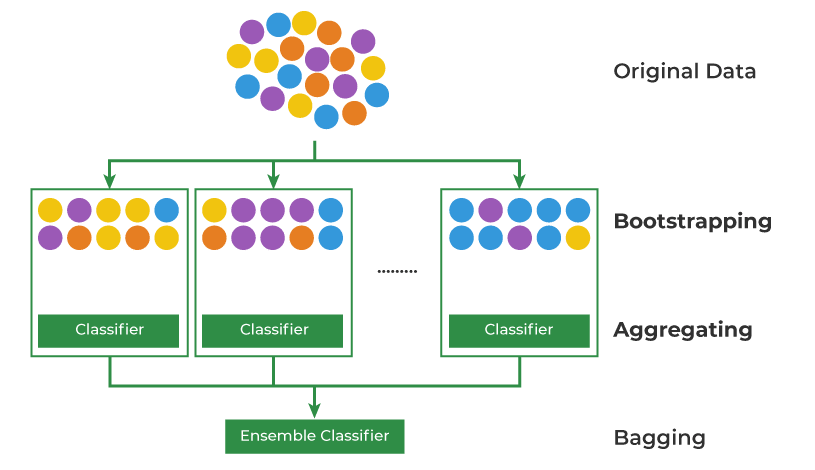

</br>  

Bagging helps improve accuracy and reduce overfitting, especially in models that have high variance.  [1]

###How does Bagging Classifier Work?

The basic steps of how a bagging classifier works are as follows [1]:

Bootstrap Sampling: In Bootstrap Sampling randomly 'n' subsets of original training data are sampled with replacement. This step ensures that the base models are trained on diverse subsets of the data, as some samples may appear multiple times in the new subset, while others may be omitted. It reduces the risks of overfitting and improves the accuracy of the model. [1]

Let's break it down step by step [1]:

> *Original training dataset: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]*

> *Resampled training set 1: [2, 3, 3, 5, 6, 1, 8, 10, 9, 1]*

> *Resampled training set 2: [1, 1, 5, 6, 3, 8, 9, 10, 2, 7]*

> *Resampled training set 3: [1, 5, 8, 9, 2, 10, 9, 7, 5, 4]*

</br>

* **Base Model Training:** In bagging, multiple base models are used. After the Bootstrap Sampling, each base model is independently trained using a specific learning algorithm, such as decision trees, support vector machines, or neural networks on a different bootstrapped subset of data. These models are typically called “Weak learners” because they may not be highly accurate on their own. Since the base model is trained independently of different subsets of data. To make the model computationally efficient and less time-consuming, the base models can be trained in parallel. [1]
* **Aggregation:** Once all the base models are trained, it is used to make predictions on the unseen data i.e. the subset of data on which that base model is not trained. In the bagging classifier, the predicted class label for the given instance is chosen based on the majority voting. The class which has the majority voting is the prediction of the model. [1]
* **Out-of-Bag (OOB) Evaluation:** Some samples are excluded from the training subset of particular base models during the bootstrapping method. These “out-of-bag” samples can be used to estimate the model’s performance without the need for cross-validation. [1]
* **Final Prediction:** After aggregating the predictions from all the base models, Bagging produces a final prediction for each instance. [1]

###Algorithm for the Bagging classifier

> **Classifier generation:**

> Let N be the size of the training set.

> for each of t iterations:

>     sample N instances with replacement from the original training set.
>     apply the learning algorithm to the sample.
>     store the resulting classifier.

> **Classification:**

> for each of the t classifiers:

>     predict class of instance using classifier.

> return class that was predicted most often.

</br>

###Advantages
*   Stable against noise. [2]
*   An effective way to convert weak models into strong learners is by parallel processing. [3]
*   It reduces the variance and overfitting, which helps make a more accurate learning model. [3]
*   It increases the accuracy of machine learning algorithms, which is helpful in regression and statistical classification. [3]

###Disadvantages
*   Needs many comparable classifiers. [2]
*   Sometimes, it can result in underfitting if they have not properly trained the model. [3]
*  Expensive in terms of using several models. [3]

In [1]:
# Run this to clone the ai engine to colab
!git clone https://github.com/sjc230/ai_engine.git

Cloning into 'ai_engine'...
remote: Enumerating objects: 219, done.
remote: Counting objects: 100% (219/219), done.
remote: Compressing objects: 100% (180/180), done.
remote: Total 219 (delta 60), reused 194 (delta 35), pack-reused 0
Receiving objects: 100% (219/219), 11.81 MiB | 14.21 MiB/s, done.
Resolving deltas: 100% (60/60), done.


In [2]:
# Run this only if you need to pull updated file from the github repository
# to pull, the colab directory must be changed to the ai engine directeroy
# after pulling, you must switch back to the original directory
%cd ai_engine
!git pull
%cd ..

/content/ai_engine
Already up to date.
/content


In [3]:
!pip install sktime
!pip install chart_studio
!python -m pip install tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.9/122.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 4.2 MB/s eta 0:00:00


In [4]:
from math import radians
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
from pathlib import Path

#import streamlit as st

import re
import pytz
from datetime import datetime
from datetime import date

import enum
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay, auc, roc_curve, roc_auc_score

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [5]:
# GET TIME SERIES DATASET
# steps 1, 2 - prepare osuleaf dataset (train and new)
from sktime.datasets import load_italy_power_demand

X_train, y_train = load_italy_power_demand(split="train", return_type="numpy2D")
X_test, y_test = load_italy_power_demand(split="test", return_type="numpy2D")

print("shape of X_train ",X_train.shape)
print("shape of y_train ",y_train.shape)
print("shape of X_test ",X_test.shape)
print("shape of y_test ",y_test.shape)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

n_classes = int(np.amax(y_train))
print("number of classes is ",n_classes)

shape of X_train  (67, 24)
shape of y_train  (67,)
shape of X_test  (1029, 24)
shape of y_test  (1029,)
number of classes is  2


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.044):
{'bag__estimator': DecisionTreeClassifier(), 'bag__max_features': 1.0, 'bag__max_samples': 1.0, 'bag__n_estimators': 10}
              precision    recall  f1-score   support

           1       0.97      0.96      0.97       513
           2       0.97      0.97      0.97       516

    accuracy                           0.97      1029
   macro avg       0.97      0.97      0.97      1029
weighted avg       0.97      0.97      0.97      1029



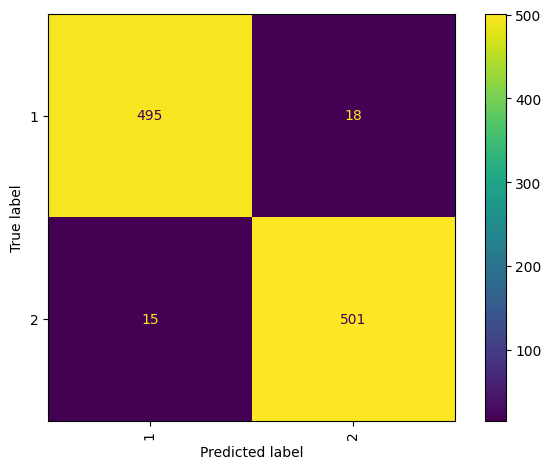

In [6]:
# SETUP & RUN BAGGING GRIDSEARCH TRAINING & TESTING

# import the classifier builder from the cloned python files
import ai_engine.sk_classifier_builder as skc

bag = skc.pipeBuild_BaggingClassifier()

names=['Bagging with Decision Trees']
pipes=[bag]


samples = np.arange(len(X_train[0,:]))

# iterate over classifiers
for j in range(len(names)):

    today = date.today()
    now = today.strftime("%b-%d-%Y")
    save_file = str(names[j]) + '-' + str(now) + '-HeatMap.png'

    grid_search = GridSearchCV(estimator=pipes[j][0], param_grid=pipes[j][1], scoring='neg_mean_squared_error',cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    score = grid_search.score(X_test, y_test)
    print("Best parameter (CV score=%0.3f):" % grid_search.best_score_)
    print(grid_search.best_params_)
    y_pred = grid_search.predict(X_test)
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test, xticks_rotation="vertical")

plt.tight_layout()
plt.show()